# Part A – Clustering and Dimension Reduction

## 1 Implement K-means clustering for handwritten digitals '0', '1', and '2' of MNIST dataset:

(7) Load the MNIST test dataset (`mnist_test.csv`) by using the pandas library, then obtain the image data denoted as `X_test` and the ground truth labels denoted as `y_test`. After that, pre-process `X_test` by scaling the image pixel values to values between 0 and 1. Source code is provided.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

mnist_test = pd.read_csv('mnist_test.csv', header=None)

#seperate the images and labels
X_test = mnist_test.iloc[:,1:].values
y_test = mnist_test.iloc[:,0].values

#normalizing the images
X_test = X_test/255.0

mnist_test.head(5)

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]

(8) Obtain all the test images and their (ground-truth) labels for '0', '1', and '2', respectively, and then rearrange the samples and labels in a random order.

In [2]:
# filterings for only digits 0, 1, 2
mnist_test_three_digit = mnist_test[mnist_test[0].isin([0, 1, 2])]

# randomising the order
mnist_test_three_digit = mnist_test_three_digit.sample(frac=1).reset_index(drop=True)

X_test = mnist_test_three_digit.iloc[:, 1:]
y_test = mnist_test_three_digit.iloc[:, 0]

X_test = X_test/255.0


(9) Use PCA with 2 components to visualise the test data samples with different colors representing different real (i.e., ground-truth) clusters in a 2d plot. In the plot legend, indicate which colours correspond to which digits. 

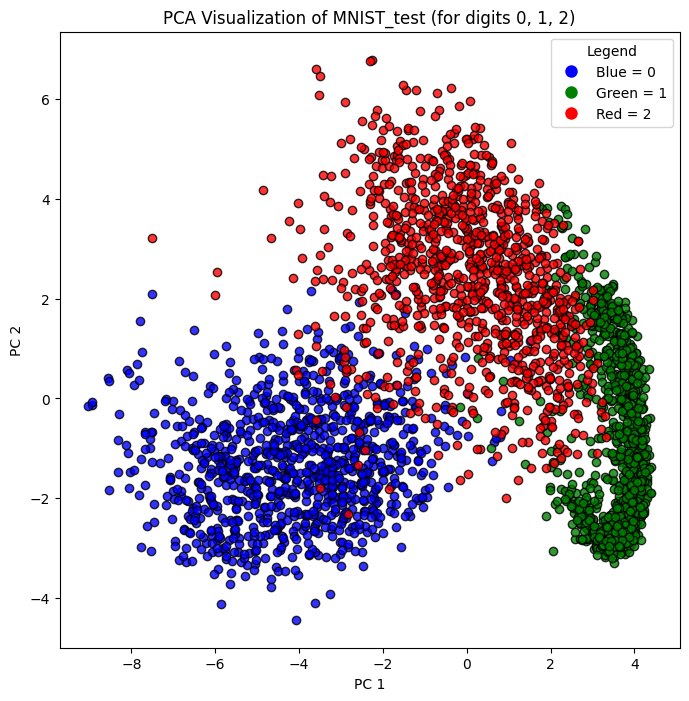

In [3]:
from matplotlib.lines import Line2D

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 8))
colors = {0: 'blue', 1: 'green', 2: 'red'}

for digit in colors:
    mask = y_test == digit
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[digit], alpha=0.8, edgecolors='k')

plt.title("PCA Visualization of MNIST_test (for digits 0, 1, 2)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Blue = 0'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Green = 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Red = 2'),
]

plt.legend(handles=legend_elements, loc='best', title='Legend')
plt.show()


(10) Using the K-means clustering algorithm to cluster the test images directly, using k=2, 3 and 4. And then use PCA with 2 components to visualize the test data samples with different colors representing different predicted clusters in a 2d plot for each k value.

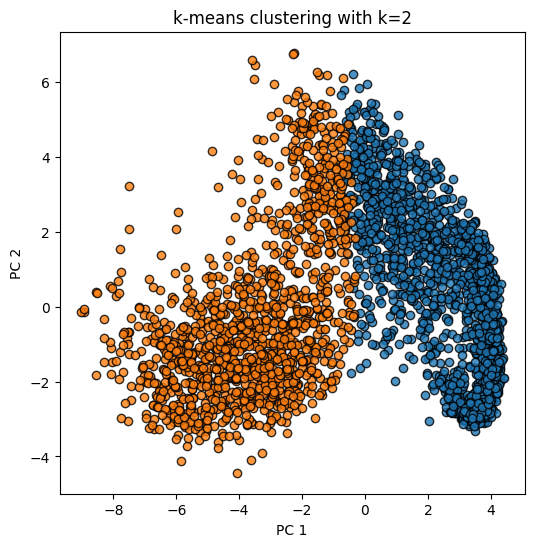

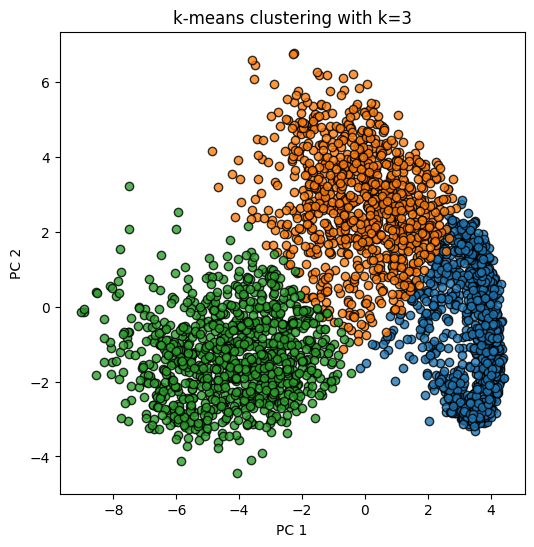

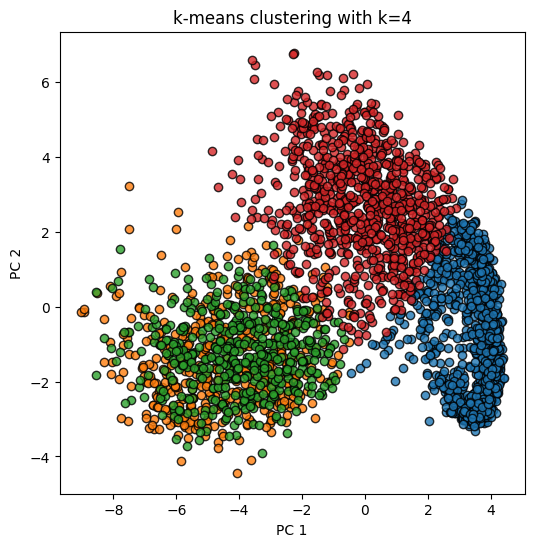

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouette_scores = []
davies_bouldin_scores = []

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_test)

    score = silhouette_score(X_test, clusters)
    silhouette_scores.append(score)
    score = davies_bouldin_score(X_test, clusters)
    davies_bouldin_scores.append(score)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_test)

    plt.figure(figsize=(6, 6))
    for cluster in range(k):
        cluster_mask = clusters == cluster
        plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], label=f"Cluster {cluster}", alpha=0.8, edgecolors='k')

    plt.title(f"k-means clustering with k={k}")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()



 (11) Calculate and print the respective silhouette_scores for k=2,3,4 in (10). Which k value produces the best clustering, according to the Silhouette score. Then answer: is it consistent with the ground truth number of clusters from MNIST?  If not consistent, does it mean that the Silhouette score is not a good criterion in general? 

In [5]:
print("--------")
print("**Silhouette scores for k-means clustering**")
for k in [2, 3, 4]:
    print(f"For {k}-means clustering, Silhouette score = {silhouette_scores[k-2]:.4f}")
print("--------")

--------
**Silhouette scores for k-means clustering**
For 2-means clustering, Silhouette score = 0.1883
For 3-means clustering, Silhouette score = 0.1698
For 4-means clustering, Silhouette score = 0.1613
--------


According to the above Silhouette scores, using k=2 provides the best results for k-means clustering of digits 0, 1, 2.  

This is not the result I expected. Since we have 3 digits, I would have expected the 3 cluster version to have the best Silhouette score (the ground-truth number of clusters from MNIST is 3).   

This likely happened because digits 0, 1, and 2 have overlapping features, and are quite hard to differentiate in this way.  

However, this does *not* mean that the Silhouette score is not a good criterion in general. The Silhouette score is more adapted to situations where clusters are well defined and separated.  

In our case, the score for k=2 ended up being higher, likely because separating the data into 2 clusters creates more distinct clusters, rather than using k=3 and getting more overlap, which Silhouette penalises. 

 (12) Calculate and print the respective Davies-Bouldin scores for k=2,3,4 in (10). Which k value produces the best clustering, according to the Davies-Bouldin score. Then answer: is it consistent with the ground truth number of clusters from MNIST?  If not consistent, does it mean that the Davies-Bouldin score is not a good criterion in general?

In [6]:
print("--------")
print(f"**DB Scores for k-means clustering**")
for k in [2, 3, 4]:
    print(f"For {k}-means clustering, Davies-Bouldin score = {davies_bouldin_scores[k-2]:.4f}")
print("--------")

--------
**DB Scores for k-means clustering**
For 2-means clustering, Davies-Bouldin score = 2.1498
For 3-means clustering, Davies-Bouldin score = 2.3226
For 4-means clustering, Davies-Bouldin score = 2.5094
--------


A lower Davies-Bouldin (DB) score indicates a better result.  

Once again, looking at the scores displayed above, it seems that k=2 has provided the best result, when we would have expected k=3 to have the best result, since we have 3 digits (and 3 ground-truth clusters).  

Like with the Silhouette score, this does *not* mean that the DB score is a bad metric. The DB score is a metric that is particularly suited to clusters which are compact and distinct from each other. It just so happens that in our situation, our clusters overlap quite significantly (esepcially digits 1 and 2 have significant overlap).

(13) Using the K-means clustering algorithm to cluster the first two components of PCA being applied to the tested images, using k=2, 3 and 4. And then compare the clustering results with those from (10) by making of 2 subplots for each value of k: one subplot with the clustering done on the whole images, one sublplot with the clustering done with just the two first components of the PCA.


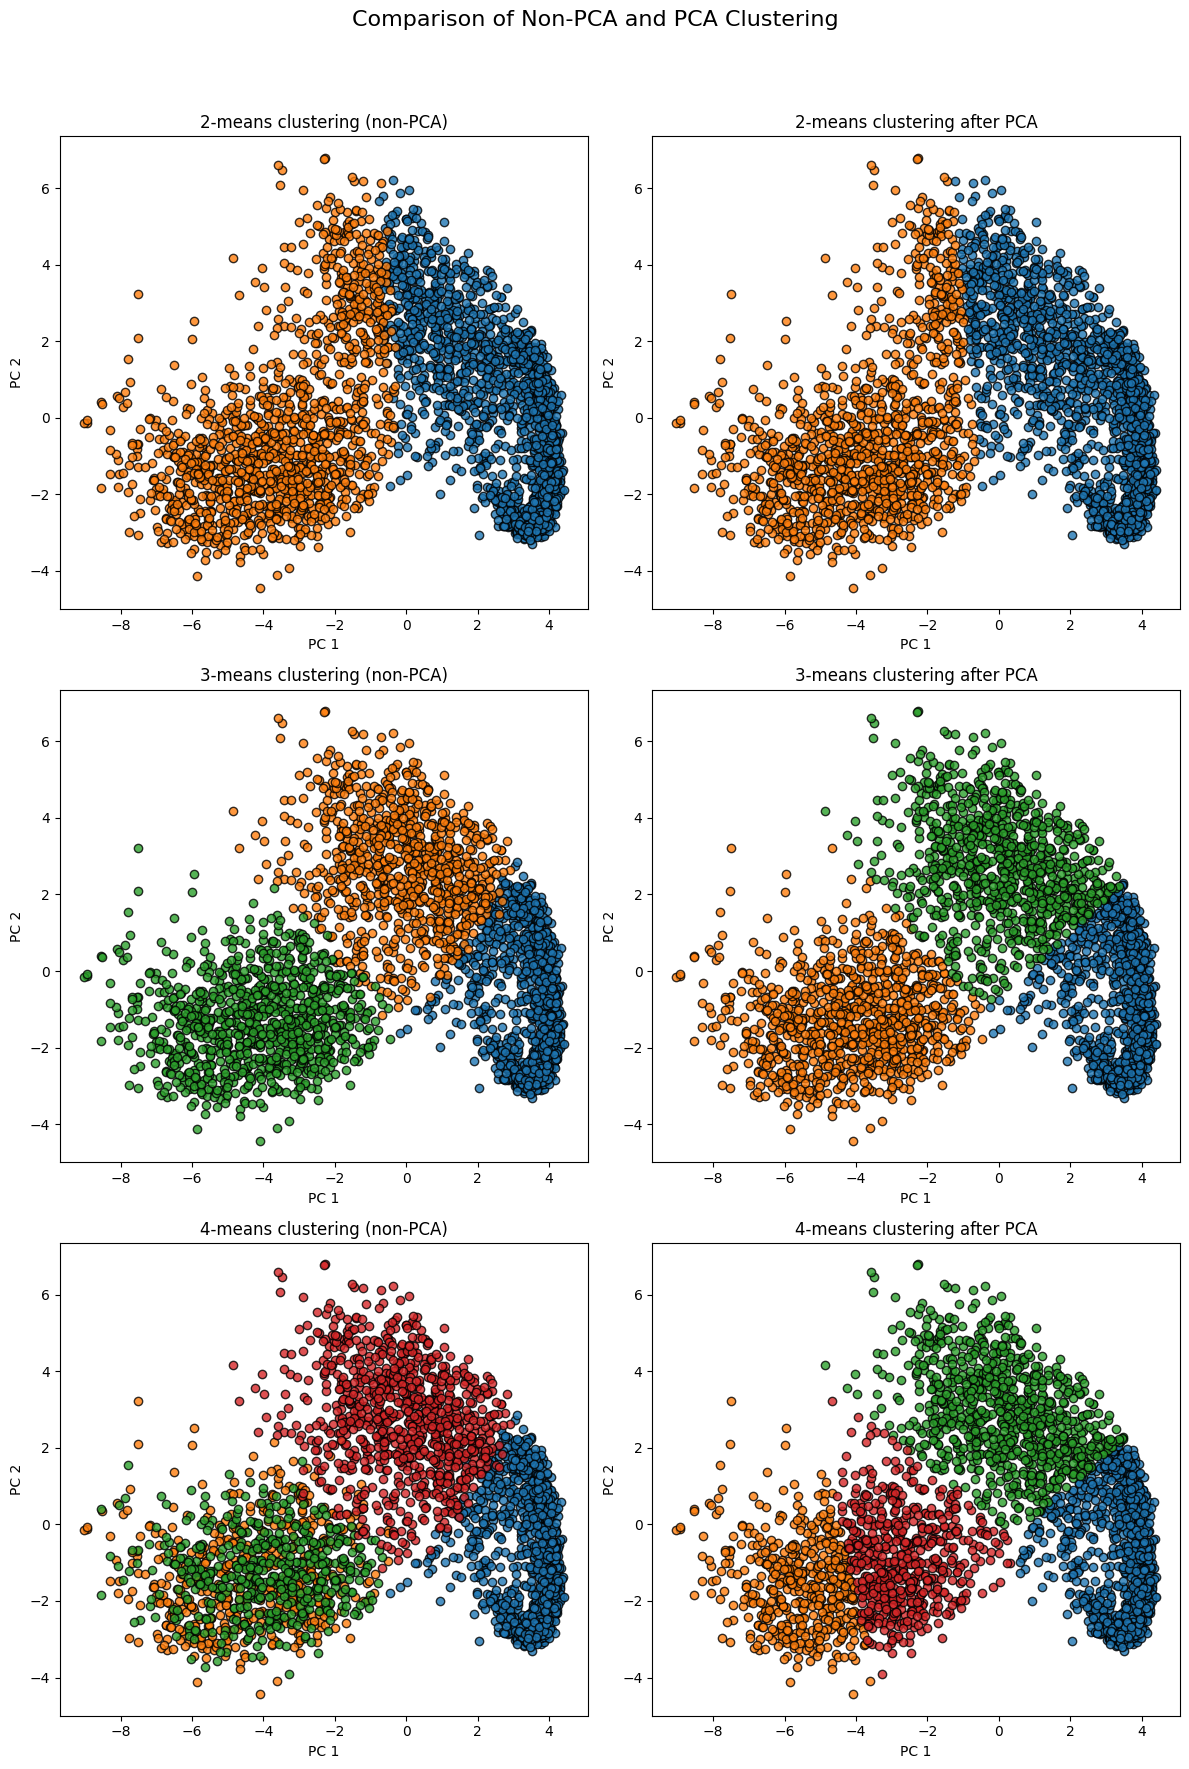

In [7]:
pca_silhouette_scores = []
pca_db_scores = []

fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, k in enumerate([2, 3, 4]):
    # redoing k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_non_pca = kmeans.fit_predict(X_test)


    # plotting the non-pca versions of the clustering
    # keep in mind to use pca to be able to plot in 2D
    for cluster in range(k):
        cluster_mask = clusters_non_pca == cluster
        axes[i, 0].scatter(
            X_pca[cluster_mask, 0],
            X_pca[cluster_mask, 1], label=f"Cluster {cluster}", alpha=0.8, edgecolors="k"
        )

    axes[i, 0].set_title(f"{k}-means clustering (non-PCA)")
    axes[i, 0].set_xlabel("PC 1")
    axes[i, 0].set_ylabel("PC 2")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_test)

    clusters_pca = kmeans.fit_predict(X_pca)

    # calculating scores for pca version
    # we have already done this for non-pca version
    pca_silhouette_score = silhouette_score(X_pca, clusters_pca)
    pca_silhouette_scores.append(pca_silhouette_score)
    pca_db_score = davies_bouldin_score(X_pca, clusters_pca)
    pca_db_scores.append(pca_db_score)

    # plotting pca version k-means clustering
    for cluster in range(k):
        cluster_mask = clusters_pca == cluster
        axes[i, 1].scatter(
            X_pca[cluster_mask, 0],
            X_pca[cluster_mask, 1], label=f"Cluster {cluster}", alpha=0.8, edgecolors="k"
        )

    axes[i, 1].set_title(f"{k}-means clustering after PCA")
    axes[i, 1].set_xlabel("PC 1")
    axes[i, 1].set_ylabel("PC 2")

fig.suptitle("Comparison of Non-PCA and PCA Clustering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


(14) Compute the Silhouette scores for different k values in (13) and then compare with those obtained in (12). Answer: are the Silhouette scores obtained from the clustering of whole images consistent with the Silhouette scores obtained by clustering only the two first PCA components?  


In [8]:
print("--------")
print("**Silhouette scores for k-means clustering AFTER PCA**")
for k in [2, 3, 4]:
    print(f"For {k}-means clustering, Silhouette score = {pca_silhouette_scores[k-2]:.4f}")
print("--------")


--------
**Silhouette scores for k-means clustering AFTER PCA**
For 2-means clustering, Silhouette score = 0.4915
For 3-means clustering, Silhouette score = 0.5430
For 4-means clustering, Silhouette score = 0.4818
--------


The Silhouette scores for k-means clustering *after PCA* are **significantly** better. We have gone from an average of 0.1736 to an average of 0.5125.   

Specifically, the Silhouette score for k=3 has shown the most improvement, going from 0.1698 to 0.5431, in other words around a 320% improvement!  
   
Moreover, when looking at the Silhouette scores obtained by clustering only the two first PCA components, we can notice that the best Silhouette score is now the score for k=3. This was what we were expecting earlier, and it now matches the ground-truth number of clusters, indicating that the performance of our clustering is better.


(15) Let's compare the result of dimensionality reductions by PCA with 2 components and tSNE with 2 components. Apply PCA and tSNE to the test images of '0', '1', and '2', and then visualize the results in 2 subplots, one for each method. Use different colors to represent different real (ground truth) clusters. 

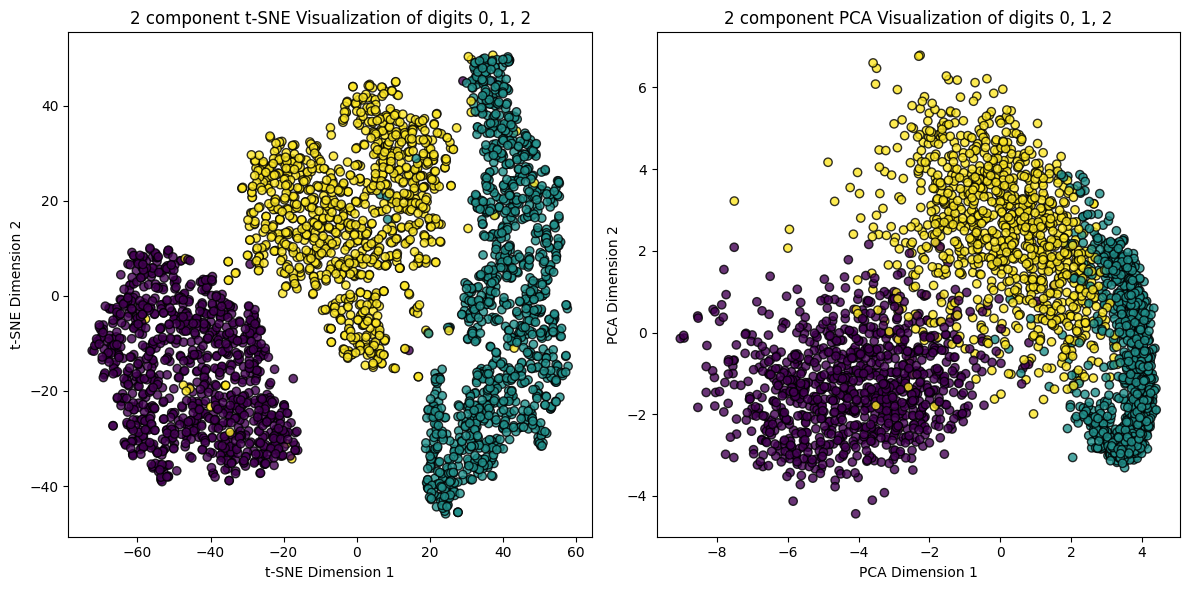

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, alpha=0.8, edgecolors='k')
axes[0].set_title("2 component t-SNE Visualization of digits 0, 1, 2")
axes[0].set_xlabel("t-SNE Dimension 1")
axes[0].set_ylabel("t-SNE Dimension 2")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test) 

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, alpha=0.8, edgecolors='k')
axes[1].set_title("2 component PCA Visualization of digits 0, 1, 2")
axes[1].set_xlabel("PCA Dimension 1")
axes[1].set_ylabel("PCA Dimension 2")

plt.tight_layout()
plt.show()


In [10]:
from sklearn.manifold import trustworthiness

pca_trustworthiness = trustworthiness(X_test, X_pca, n_neighbors=5)
tsne_trustworthiness = trustworthiness(X_test, X_tsne, n_neighbors=5)

print(f"PCA Trustworthiness: {pca_trustworthiness:.4f}")
print(f"t-SNE Trustworthiness: {tsne_trustworthiness:.4f}")

PCA Trustworthiness: 0.8369
t-SNE Trustworthiness: 0.9916


## 2. Implementing DBSCAN clustering for handwritten digitals '0', '1', and '2' of mnist dataset:


(16) Firstly, use the DBSCAN clustering algorithm to cluster the test images directly by setting the eps parameter to 0.5 and the min_sample to 5. And then apply DBSCAN to cluster the first 2 PCA components of the test images by setting the eps parameter to 0.5 and the min_sample to 5.
Visualize the clustering results in two subplots for each k value and also print out the numbers of estimated clusters.






--------
**Non-PCA DBSCAN clustering**
Number of clusters: 0
Number of noise points: 3147
--------
**PCA DBSCAN clustering**
Number of clusters: 3
Number of noise points: 35
--------


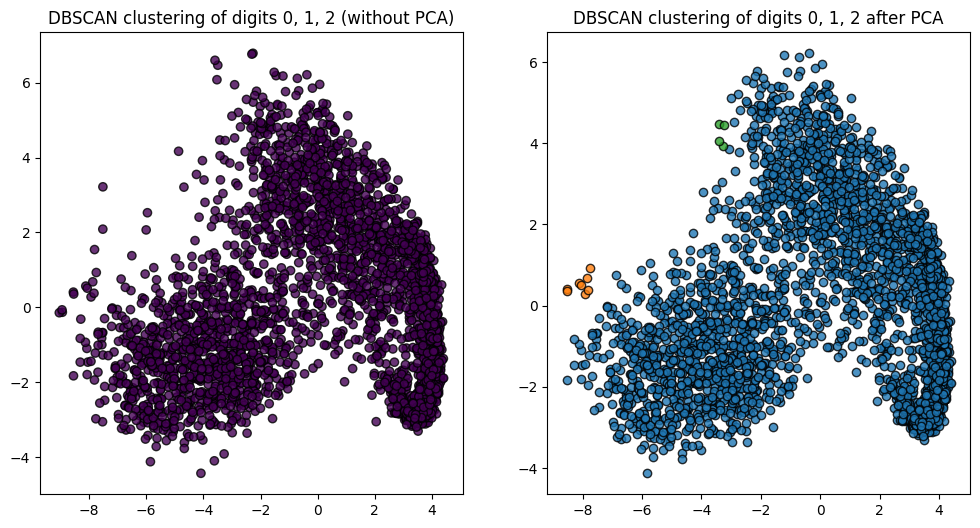

In [11]:
from sklearn.cluster import DBSCAN

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
non_pca_clusters = dbscan.fit_predict(X_test)

n_non_pca_clusters = len(set(non_pca_clusters)) - (1 if -1 in non_pca_clusters else 0)
n_non_pca_noise = list(non_pca_clusters).count(-1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test) 

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=non_pca_clusters, alpha=0.8, edgecolors='k')
axes[0].set_title("DBSCAN clustering of digits 0, 1, 2 (without PCA)")

print("--------")
print("**Non-PCA DBSCAN clustering**")
print(f"Number of clusters: {n_non_pca_clusters}")
print(f"Number of noise points: {n_non_pca_noise}")
print("--------")



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_clusters = dbscan.fit_predict(X_pca)

n_pca_clusters = len(set(pca_clusters)) - (1 if -1 in pca_clusters else 0)
n_pca_noise = list(pca_clusters).count(-1)

for cluster in range(n_pca_clusters):
    cluster_mask = pca_clusters == cluster
    axes[1].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], alpha=0.8, edgecolors='k')
axes[1].set_title("DBSCAN clustering of digits 0, 1, 2 after PCA")

print("**PCA DBSCAN clustering**")
print(f"Number of clusters: {n_pca_clusters}")
print(f"Number of noise points: {n_pca_noise}")
print("--------")



(17) Setting the eps parameter in (16) to 0.5 and 1, and briefly summarize your observations of the experimental results in terms of the stability of the DBSCAN method in comparison to K-means: is DBSCAN more or less stable than K-means, when it comes to changing hyperparameters?


 
DBSCAN clustering is more sensitive to hyperparameters. DBSCAN clustering is highly dependent on choosing an appropriate eps and min_samples value, and changing these parameters can lead to drastic changes in the clustering. It is less stable than K-means. 

(18) Compare the performance of K-means and DBSCAN when clustering the data points obtained by applying tSNE with 2 components on test images of '0', '1', and '2'.

Set k in K-means to k=3. Play with different values of (eps, min_samples) in DBSCAN to find a proper setup. Visualize the clustering results in 2 subplots. Answer: which method is more robust from the above results? How did you arrive at that conclusion?


**PCA DBSCAN clustering**
Number of clusters: 3
Number of noise points: 35
--------


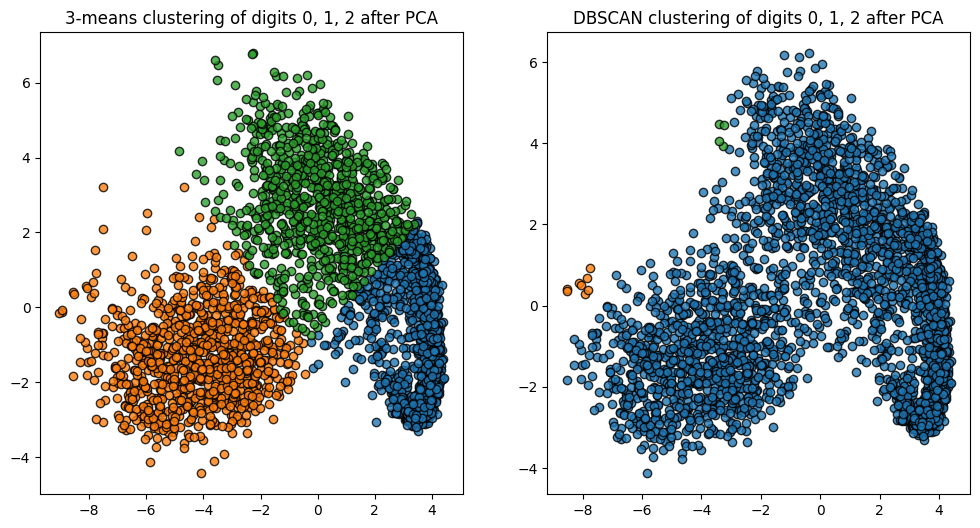

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans.fit_predict(X_pca)

for cluster in range(3):
    cluster_mask = clusters_pca == cluster
    axes[0].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], label=f"Cluster {cluster}", alpha=0.8, edgecolors="k")
axes[0].set_title("3-means clustering of digits 0, 1, 2 after PCA")

dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_clusters = dbscan.fit_predict(X_pca)

n_pca_clusters = len(set(pca_clusters)) - (1 if -1 in pca_clusters else 0)
n_pca_noise = list(pca_clusters).count(-1)

for cluster in range(n_pca_clusters):
    cluster_mask = pca_clusters == cluster
    axes[1].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], alpha=0.8, edgecolors='k')
axes[1].set_title("DBSCAN clustering of digits 0, 1, 2 after PCA")

print("**PCA DBSCAN clustering**")
print(f"Number of clusters: {n_pca_clusters}")
print(f"Number of noise points: {n_pca_noise}")
print("--------")

(19) Implement Spectral Clustering and Gausian mixture models to cluster the 2 components of tSNE for the test images of '0', '1', and '2'. Set the number of clusters to be 3. 

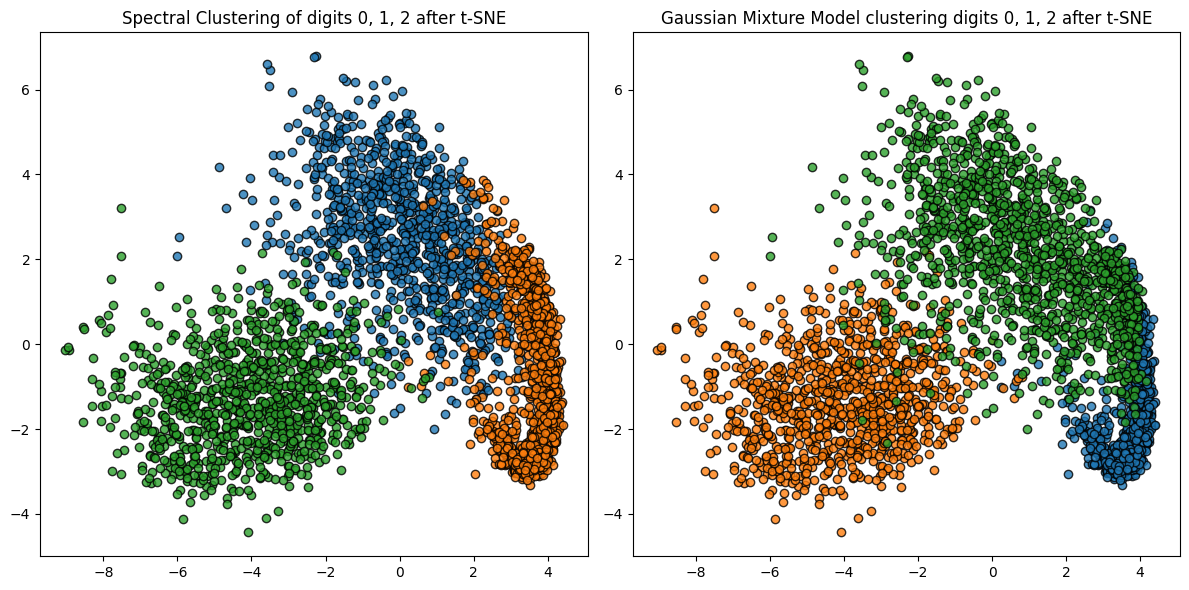

In [13]:
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score


tsne = TSNE(n_components=2, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(X_test)

spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral_clustering.fit_predict(X_tsne)

gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
gmm_clusters = gmm.fit_predict(X_tsne)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for cluster in range(3):
    cluster_mask = spectral_clusters == cluster
    axes[0].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], alpha=0.8, edgecolors='k')
axes[0].set_title("Spectral Clustering of digits 0, 1, 2 after t-SNE")

for cluster in range(3):
    cluster_mask = gmm_clusters == cluster
    axes[1].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], alpha=0.8, edgecolors='k')
axes[1].set_title("Gaussian Mixture Model clustering digits 0, 1, 2 after t-SNE")

plt.tight_layout()
plt.show()


(20). Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. 

DBSCAN needs to find all neighbours within the eps radius for every point, whereas k-means only computes distances between points and certain cluster centre points.  

DBSCAN takes longer to run when eps becomes greater. This is because, since DBSCAN needs to find all neighbours within eps distance, a higher eps means more neighbours for each point.

(21). Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases.



k-means and DBSCAN are useful in different situations.  

When we have:
- a fixed number of clusters, which we know ahead of time
- clusters which are mostly spherical
- clusters of balanced sizes
- low noise  

using k-means might be preferable.  

On the other hand, when we have:
- an unknown number of clusters
- non-spherical clusters
- clusters with differing densities  


using DBSCAN is preferable.

_____________________

# Part B – Classification and Regression

## 1 Implement a multi-class Logistic Regression classifier for CIFAR10 dataset.

(22) Load "cifar10_train.csv". In this file, every row represents and image, and every one of the 3072 columns represent a pixel value. 3072 = 32 x 32 x 3: columns 0-1023 represent a 32x32 image of red pixel values, columns 1024-2047 represent a 32x32 image of green pixel values, and columns 2048-3071 represent a 32x32 image of blue pixel values. A greyscale image would be an average of the red, green, and blue channels of an image.

First, load the "cifar10_train.csv" file and convert it to greyscale images using the code below. Then, perform train-test-split to prepare both the training data in terms of (X_train, y_train) and test data in terms of (X_test, y_test). The code for this question is provided below to faciliate the implementation for the following questions.

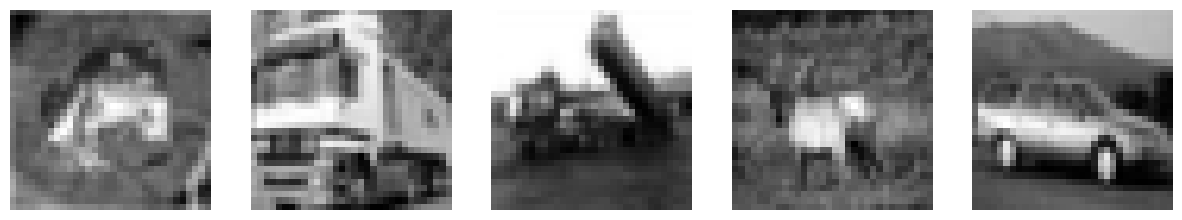

In [14]:

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
#load the dataset
cifar10_train = pd.read_csv("cifar10_train.csv")


#seperate the images and labels
XX = cifar10_train.iloc[:,:-1].values
y = cifar10_train.iloc[:,-1].values

# convert RGB images to gray-scale images
X = np.zeros((XX.shape[0], 1024))
X = (XX[:, 0:1024]+XX[:, 1024:1024*2]+XX[:, 1024*2:])/3.0/255.0


plt.figure(figsize=(15,3))
for i in range(5):
  image = X[i,:].reshape(32,32)
  plt.subplot(1, 5, i+1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

(23) Implement a two-class Logistic Regression classifer for the first two classes (with labels 0 and 1) in CIFAR10 by using LogisticRegression from `sklearn.linear_model`. Set solver='sag' and max_iter=100 in LogisticRegression- (look at the documentation online if needed). Print both the training and test classfication accuracices.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_mask = (y_train == 0) | (y_train == 1)
X_train_bin = X_train[train_mask]
y_train_bin = y_train[train_mask]

test_mask = (y_test == 0) | (y_test == 1)
X_test_bin = X_test[test_mask]
y_test_bin = y_test[test_mask]

logistic_regression = LogisticRegression(solver='sag', max_iter=100, random_state=1)
logistic_regression.fit(X_train_bin, y_train_bin)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_bin)

test_accuracies = []
train_accuracies = []

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_bin, y_pred_train)
train_accuracies.append(train_accuracy)

print("--------")
print("**Logistic Regression - max_iter=100")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")
print("--------")

--------
**Logistic Regression - max_iter=100
Test accuracy: 0.78905
Train accuracy: 0.81565
--------


c:\eaca\com1011-cwork2\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(24) Test solver='sag' and max_iter={150, 200} in (23). Print both the training and test classfication accuracices.

In [16]:
logistic_regression = LogisticRegression(solver='sag', max_iter=150, random_state=1)
logistic_regression.fit(X_train_bin, y_train_bin)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_bin)

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_bin, y_pred_train)
train_accuracies.append(train_accuracy)
print("--------")
print("**Logistic Regression - max_iter=150")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")


logistic_regression = LogisticRegression(solver='sag', max_iter=200, random_state=1)
logistic_regression.fit(X_train_bin, y_train_bin)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_bin)

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_bin, y_pred_train)
train_accuracies.append(train_accuracy)
print("--------")
print("**Logistic Regression - max_iter=200")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")
print("--------")


c:\eaca\com1011-cwork2\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--------
**Logistic Regression - max_iter=150
Test accuracy: 0.78702
Train accuracy: 0.81614
--------
**Logistic Regression - max_iter=200
Test accuracy: 0.78702
Train accuracy: 0.81677
--------


c:\eaca\com1011-cwork2\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(25) Plot both the training and test accuracies for the maximum iterations of 100, 150, 200 being set in LogisticRegression, based on the results from (23) and (24). Put the two curves in the same 2d plot for easy comparison. Make X axis be the number of maximum iterations (100, 150, 200) and the y axis be the accuracy.

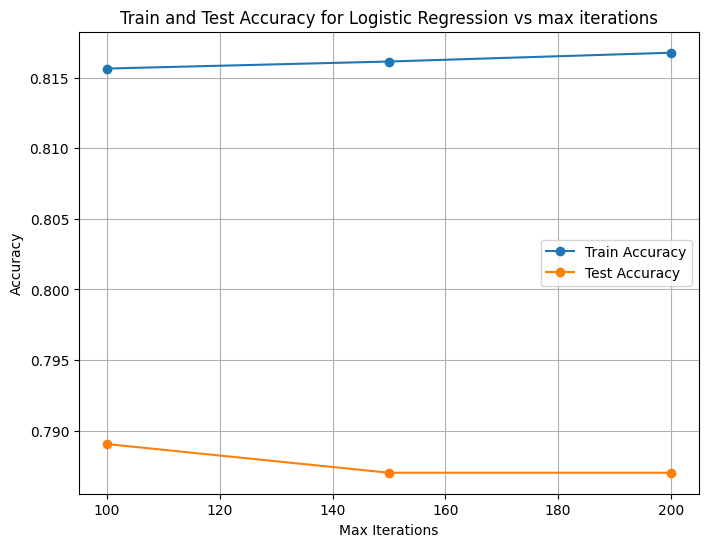

In [17]:
max_iterations = [100, 150, 200]

plt.figure(figsize=(8, 6))
plt.plot(max_iterations, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(max_iterations, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy for Logistic Regression vs max iterations")
plt.legend()
plt.grid(True)
plt.show()


(26) Three classification models have been obtained from (23) and (24) by setting different values for the hyper-parameter max_iter. Which model should we choose? Explain why. 

Does the plot in (25) exhibit over-fitting? Explain why. 

The metric which best evaluates the quality of our model is the test accuracy (the accuracy when predicting the test data), and not the train accuracy. This metric more accurately reflects "real-world" performance of our model. Therefore the model we should choose is the first one, with max_iter=100.   

When increasing the maximum iterations, our train accuracy increases, but our test accuracy decreases. This is because we have overfitting. When a model learns the specific details of one dataset, it might be very good at classifying that particular data, but it will fail at classifying new data, which is not the intended outcome. When a model is overfit, it has trained itself on the noise in the training data, which is why it is not able to generalise.  

The plot in (25) does indeed exhibit overfitting. As we increase the maximum iterations, the accuracy increases when testing on the training data, but not on the test data. So the model is overfitting, as it is conforming too closely to this specific training data, and not able to generalise.

(27) Let's do some data augmentation to improve the test performance in (23) and (24). In doing so, prepare additional training data for the first two classes of CIFAR10 by flipping each training image horizontally (i.e. from left to right). Display an original image and its flipped one for visualisation.

Then, use both the original training data and the flipped training data to train the two-class Logistic Regression classifer. Print out the training and test accuracies for max_iter = {500, 1000}.

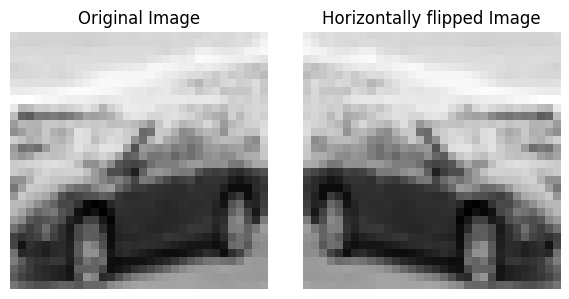

c:\eaca\com1011-cwork2\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--------
**Logistic Regression - original data - max_iter=500
Test accuracy: 0.78347
Train accuracy: 0.81951
--------
**Logistic Regression - original data - max_iter=1000
Test accuracy: 0.78245
Train accuracy: 0.81938


c:\eaca\com1011-cwork2\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--------
**Logistic Regression - augmented data - max_iter=500
Test accuracy: 0.78499
Train accuracy: 0.80929
--------
**Logistic Regression - augmented data - max_iter=1000
Test accuracy: 0.78499
Train accuracy: 0.80954


In [18]:
original_image = X_train_bin[0].reshape(32, 32)

flipped_image = np.fliplr(original_image)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Horizontally flipped Image")
plt.imshow(flipped_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# ----------------

X_train_augmented = []
y_train_augmented = []

for i in range(X_train_bin.shape[0]):
    original_image = X_train_bin[i].reshape(32, 32)
    
    flipped_image = np.fliplr(original_image)
    
    X_train_augmented.append(original_image.flatten())
    X_train_augmented.append(flipped_image.flatten())
    
    y_train_augmented.append(y_train_bin[i])
    y_train_augmented.append(y_train_bin[i])

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# ----------------

logistic_regression = LogisticRegression(solver='sag', max_iter=500, random_state=1)
logistic_regression.fit(X_train_bin, y_train_bin)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_bin)

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_bin, y_pred_train)
train_accuracies.append(train_accuracy)
print("--------")
print("**Logistic Regression - original data - max_iter=500")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")


logistic_regression = LogisticRegression(solver='sag', max_iter=1000, random_state=1)
logistic_regression.fit(X_train_bin, y_train_bin)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_bin)

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_bin, y_pred_train)
train_accuracies.append(train_accuracy)
print("--------")
print("**Logistic Regression - original data - max_iter=1000")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")

# ----------------

logistic_regression = LogisticRegression(solver='sag', max_iter=500, random_state=1)
logistic_regression.fit(X_train_augmented, y_train_augmented)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_augmented)

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_augmented, y_pred_train)
train_accuracies.append(train_accuracy)
print("--------")
print("**Logistic Regression - augmented data - max_iter=500")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")

logistic_regression = LogisticRegression(solver='sag', max_iter=1000, random_state=1)
logistic_regression.fit(X_train_augmented, y_train_augmented)

y_pred = logistic_regression.predict(X_test_bin)
y_pred_train = logistic_regression.predict(X_train_augmented)

test_accuracy = accuracy_score(y_test_bin, y_pred)
test_accuracies.append(test_accuracy)
train_accuracy = accuracy_score(y_train_augmented, y_pred_train)
train_accuracies.append(train_accuracy)
print("--------")
print("**Logistic Regression - augmented data - max_iter=1000")
print(f"Test accuracy: {test_accuracy:.5f}")
print(f"Train accuracy: {train_accuracy:.5f}")



(28) Is the image-flip technique a reasonable approach for the considered classification problem? 

Is the test accuracy obtained in (27) better than those in (23) and (24)? Explain the observed phenomenon. 

Consider three approaches: 1-change to advanced machine learning models, 2-employ other data augmentation techniques, 3-employ other data pre-processing techniques.  What do you think is the most effective approach to improve the test performance ? Why?

Elaborate on the most effective approach you have chosen by providing more detailed suggestions.

The image-flip technique is not a reasonable approach for the considered classification problem. The flipping of the images does not create much new useful information, and does not seem to help make the classes more differentiable. The test accuracy obtained in (27) using the image flip technique is not any higher than the accuracy we had in (23) or (24). The model we are using, the logistic regression, is a relatively simple model, and might not be the best choice for this classification task. Our classes might not be linearly separable, as we are dealing with relatively complex images. We saw earlier that even when increasing the number of maximum iterations, we were not able to improve the performance of our model, as we were encountering overfitting (as can be seen from the training accuracy increasing, but the test accuracy stagnating).  

We consider three possible approaches:
- changing to a more advanced machine learning model  

Switching to a more advanced model would be a very effective strategy in improving classification performance. This is because the model we were previously using, the logistic regression, is not complex enough to deal with the non-linear (and high-dimensional) classes in our dataset. If we instead switched to a more advanced model, such as a convolutional neural network, we could see significantly improved classification performance.  

- employing additional data augmentation techniques  

Making use of additional data augmentation techniques would likely be helpful, however this strategy alone would not be sufficient in significantly improving classification performance on our data. Some techniques we could employ could be to add noise or adjust brightness for example. These techniques would be useful, but would prove to be much more valuable if we combine them with using a more suitable model.

- employing other data pre-processing techniques

Finally, we could also employ other data pre-processing techniques to improve classification performance. We have seen earlier that dimensionality reduction (using techniques such as PCA or t-SNE) were very helpful. Additionally, we can implement feature extraction before training the model to improve the quality of the data. However, just like for data augmentatio, data pre-processing would likely be helpful, but we need to change our model if we want to see any significant improvement.  

To sum up, the most effective approach (if having to choose between the three) would be to use a more advanced model, which is better capable at classifying our non-linearly-separated, high-dimensional data. A CNN (convolutional neural network) would be much better suited for this task. 




## 2 Implement regression for the housing dataset. 

(29) Check how normalization affects the regression performance with the dataset "housing.csv".

Firstly, visualize the correlation matrix in terms of the heat map for all the 14 features.

Secondly, implement a Linear model that use only the 'CRIM' and 'RM' to predict 'RAD' without normalization. In doing so, split the data into training and test datasets. Report both the training and test errors in terms of mean squared error (MSE).

Thirdly, do normalization (refer to the operation of scaling each feature to be in the range of [0,1]) to the data, and then implement a Linear model that use normalized 'CRIM' and normalized 'RM' to predict normalized 'RAD'. Report both the training and test errors.  What conclusions can you draw by comparing the above prediction results regarding the impact of normalization?





In [19]:
import seaborn as sns

housing_data = pd.read_csv('housing.csv')
housing_data.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

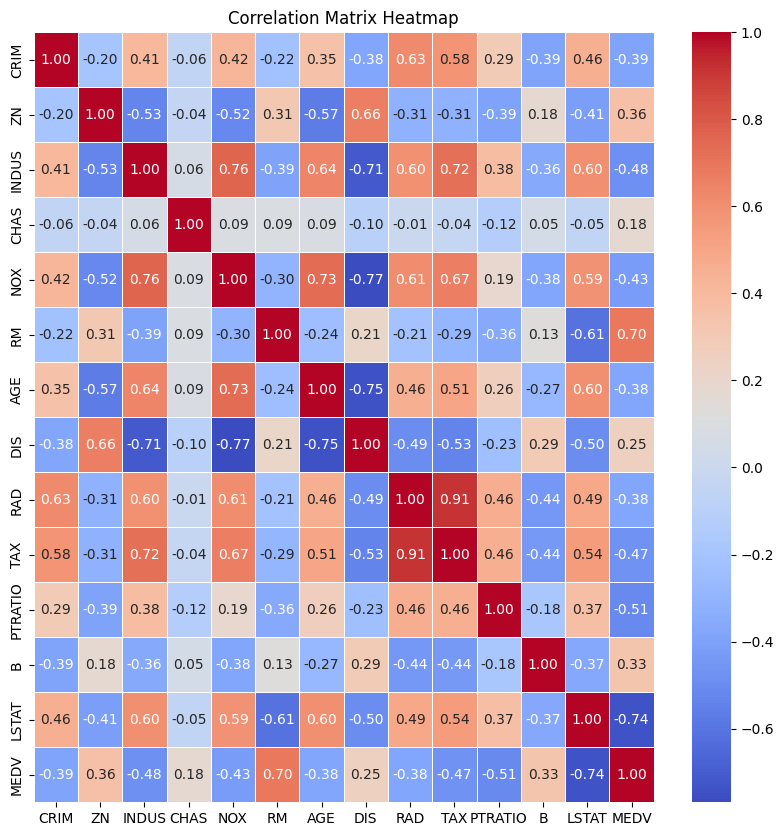

In [20]:
correlation_matrix = housing_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = housing_data[['CRIM', 'RM']]
y = housing_data['RAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test) # for test data
y_pred_train = linear_reg.predict(X_train) # for training data

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)

print("--------")
print("**Predicting 'RAD' with 'CRIM' and 'RM', no normalisation**")
print(f"MSE, test data: {mse_test:.2f}")
print(f"MSE, training data: {mse_train:.2f}")
print("--------")


--------
**Predicting 'RAD' with 'CRIM' and 'RM', no normalisation**
MSE, test data: 42.82
MSE, training data: 46.63
--------


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_norm = scaler_X.fit_transform(X)
y_norm = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
y_pred_train = linear_reg.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)

y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

y_train_original_scale = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
y_pred_train_original_scale = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()

mse_test_norm_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
mse_train_norm_original_scale = mean_squared_error(y_train_original_scale, y_pred_train_original_scale)
print("--------")
print("**Predicting 'RAD' with 'CRIM' and 'RM', with normalisation**")
print(f"MSE, test data: {mse_test_norm_original_scale:.2f}")
print(f"MSE, training data: {mse_train_norm_original_scale:.2f}")
print("--------")
print("**Predicting 'RAD' with 'CRIM' and 'RM', no normalisation (NORMALISED SCALE)**")
print(f"MSE, test data: {mse_test:.3f}")
print(f"MSE, training data: {mse_train:.3f}")
print("--------")


--------
**Predicting 'RAD' with 'CRIM' and 'RM', with normalisation**
MSE, test data: 42.82
MSE, training data: 46.63
--------
**Predicting 'RAD' with 'CRIM' and 'RM', no normalisation (NORMALISED SCALE)**
MSE, test data: 0.081
MSE, training data: 0.088
--------


We can see that applying normalisation has not improved the performance of our model.  

It is important to note that normalisation does not affect the correlation between the features and the label in our data. It merely changes the scale, which is irrelevant as far as the accuracy of our model is concerned.

(30) Check how correlation strength affects the regression performance with the dataset "housing.csv".

Use normlized "CRIM" and normalized "NOX" to predict normalized "RAD" by using a linear model. Print out the training and test mean squared error. Remember using the same random_state and the same test_size when running the train_test_split function from sklearn.model_selection. 

Use normlized "CRIM" and normalized "DIS" to predict normalized "RAD" by using a linear model. Print out the training and test mean squared error. Remember using the same random_state and the same test_size when running the train_test_split function from sklearn.model_selection.  




In [23]:
# NOTE: from now on, we will only compare MSEs calculated on normalised data
# so that the scale for the MSEs is the same

X = housing_data[['CRIM', 'NOX']]
y = housing_data['RAD']

X_norm = scaler_X.fit_transform(X)
y_norm = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
y_pred_train = linear_reg.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)

print("--------")
print("**Predicting 'RAD' with 'CRIM' and 'NOX', with normalisation (NORMALISED SCALE)**")
print(f"MSE, test data: {mse_test:.3f}")
print(f"MSE, training data: {mse_train:.3f}")
print("--------")

X = housing_data[['CRIM', 'DIS']]
y = housing_data['RAD']

X_norm = scaler_X.fit_transform(X)
y_norm = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
y_pred_train = linear_reg.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)

print("**Predicting 'RAD' with 'CRIM' and 'DIS', with normalisation (NORMALISED SCALE)**")
print(f"MSE, test data: {mse_test:.3f}")
print(f"MSE, training data: {mse_train:.3f}")
print("--------")


--------
**Predicting 'RAD' with 'CRIM' and 'NOX', with normalisation (NORMALISED SCALE)**
MSE, test data: 0.067
MSE, training data: 0.066
--------
**Predicting 'RAD' with 'CRIM' and 'DIS', with normalisation (NORMALISED SCALE)**
MSE, test data: 0.071
MSE, training data: 0.078
--------


(31) What conclusions can you draw by comparing the test errors of (29) and (30) regarding the impact of the correlation strength (check the heat map shown above)?

From the MSEs printed above, we can see that using 'CRIM' and 'NOX' features yielded a better result for predicting 'RAD', compared to using features 'CRIM' and 'DIS'. (the MSE was lower for the first model, indicating better performance)

This is compliant with what we would have expected: the higher the correlation strength between the features and the label, the better the performance of the linear model.  

We can cross-reference this with the heatmap from (29): the correlation strength between 'RAD' and 'NOX' is 0.61, whereas between 'RAD' and 'DIS', the correlation strength is only -0.49 (we are interested in the absolute values, and abs(0.61) > abs(-0.49)), which confirms our observation that using 'NOX' alongside 'CRIM' was a better choice than 'DIS'.

(32) Convert a regression problem to a classification problem of 10 classes.

First pre-processing the data for "RAD" to be in the range of [0,10) denoted as yy in the data type of float. Then tranform (via the rounding opertion) yy into the data type of integer within {0,2,.., 9} denoted as y. 

Obtain training and test datasets from  normlized "CRIM", normalized "NOX", and the ground truth labels y. Then implement a Logistic classifer and report the training and test accuracies.

Rescale the predicted labels from the Logistic classifer to the range of [0, 1] and then compute and print out the mean squared errors (MSEs) with respect to the normalized ground truth "RAD" for both training and test datasets.

Compare the obtained MSEs with those in (30). Which method produces lower MSE for test dataset?  Which method produces lower MSE for training dataset? Do you think converting a regression problem to a classification problem is a resonable approch in general?


In [24]:
X = housing_data[['CRIM', 'NOX']]
y = housing_data['RAD']

original_y = housing_data['RAD'].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 10))

yy = scaler.fit_transform(original_y).flatten().astype(float)
y_transformed = np.round(yy).astype(int)

X_norm = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_transformed, test_size=0.2, random_state=1)

logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)



# now normalising to range [0, 1] to calculate MSE

y_pred_rescaled = y_pred / 10.0
y_pred_train_rescaled = y_pred_train / 10.0

scaler_y = MinMaxScaler()
normalised_y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

_, _, y_train, y_test = train_test_split(X_norm, normalised_y, test_size=0.2, random_state=1)

mse_test = mean_squared_error(y_test, y_pred_rescaled)
mse_train = mean_squared_error(y_train, y_pred_train_rescaled)


print("--------")
print("**Classifying 'RAD' into 10 classes, with normalised 'CRIM' and 'NOX'")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"MSE, test data: {mse_test:.3f}")
print(f"MSE, training data: {mse_train:.3f}")
print("--------")

--------
**Classifying 'RAD' into 10 classes, with normalised 'CRIM' and 'NOX'
Test accuracy: 0.5098
Train accuracy: 0.5074
MSE, test data: 0.059
MSE, training data: 0.046
--------


When comparing the MSE values we obtained, we can see that our error is lower when converting the problem to a classification problem.  

In (32), we got a test MSE of 0.059, and a traning MSE of 0.046, whereas in (30), we got a test MSE of 0.071, and a training MSE of 0.078. In other words, our errors were higher in the regression problem compared to the classification problem.  

We also need to answer the question of whether converting a regression problem to a classification problem is a reasonable approach in general. This conversion comes with some advantages and some disadvantages, so whether or not the conversion is suitable depends on the specifics of the problem at hand.  

On one hand, converting to a classification problem is a very reasonable approach if the aim of the model is to group the data into categories, instead of giving an exact estimate. As we saw in our error calculations, converting to a classification comes with the benefit of higher accuracy, since we are no longer attempting to make exact predicitions, but simply classify into the correct group.  

On the other hand, the conversion of a regression problem to a classification problem also comes with some disadvantages. For one, there is an inherent loss of precision in the predicted values, since we are no longer getting a numerical prediction, but just a class.  

With this in mind, converting a regression problem to a classification problem might be a valid strategy, that presents advantages, provided we remain conscious of the loss of granularity in the predictions. 

(33) Convert the same regression problem in (32) to a classification problem of 100 classes. Report the MSEs for both training and test datasets.

Compare the obtained MSEs with those in (30). Which method produces lower MSE for the test dataset? Which method produces lower MSE for the training dataset? How to futher improve the peformance of the regression method?

In [25]:
original_y = housing_data['RAD'].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 100))

yy = scaler.fit_transform(original_y).flatten().astype(float)
y_transformed = np.round(yy).astype(int)

X_norm = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_transformed, test_size=0.2, random_state=1)

logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)

# now normalising to range [0, 1] to calculate MSE

y_pred_rescaled = y_pred / 100.0
y_pred_train_rescaled = y_pred_train / 100.0

scaler_y = MinMaxScaler()
normalised_y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

_, _, y_train, y_test = train_test_split(X_norm, normalised_y, test_size=0.2, random_state=1)

mse_test = mean_squared_error(y_test, y_pred_rescaled)
mse_train = mean_squared_error(y_train, y_pred_train_rescaled)


print("--------")
print("**Classifying 'RAD' into 100 classes, with normalised 'CRIM' and 'NOX'")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"MSE, test data: {mse_test:.3f}")
print(f"MSE, training data: {mse_train:.3f}")
print("--------")


--------
**Classifying 'RAD' into 100 classes, with normalised 'CRIM' and 'NOX'
Test accuracy: 0.4804
Train accuracy: 0.4332
MSE, test data: 0.051
MSE, training data: 0.053
--------


When classifying into 10 classes, we got the following results:
```
Test accuracy: 0.5098
Train accuracy: 0.5074
MSE, test data: 0.059
MSE, training data: 0.046
```
When classifying into 100 classes, we got the following results:
```
Test accuracy: 0.4804
Train accuracy: 0.4332
MSE, test data: 0.051
MSE, training data: 0.053
```

What we can infer from this data is that, firstly, our accuracy has gone down when going from 10 to 100 classes. This means that the model is predicting the correct class less often. However, this does not mean that our model is worse - with 10 times more classes, the difficulty of sorting data into the correct class also becomes much harder.  

With random guessing, and 100 classes, random guessing would result in 1% accuracy - much lower than the 48% observed. This means our model is performing mostly well. 

Moreover, when comparing the MSEs of the 10-class and 100-class classifiers, we can see that the **10-class model** is producing a lower MSE for the **training data**, whereas the **100-class model** is providing a lower MSE for the **test data**. We want to prioritise the model yielding a lower error for the test data, since it is a more representative metric of real-world performance.  

We could further improve the performance of our regression model by including additional features which have high correlation with the data we are trying to predict. We could also include polynomial regressions to capture any non-linear correlations in the data. Finally, we could use k-fold cross-validation to ensure that the model performs well over different train-test splits of the data.

________________

# Part C – Dimensionality reduction
Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states.

(34)	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts.

In this scenario, we want to implement dimensionality reduction to help us visualise the data in a lower-dimensional space.  

A first option would be to use PCA.  
PCA has certain advantages for this situation. Firstly, it is efficient to compute, which means that as we scale our data (in terms of dimensions or quantity), PCA will scale. PCA is also a deterministic algorithm, which ensures that the results we get are reproducable (which in our example means that the visualisation of the data will be consistent accross runs).  
PCA preserves the global structures of the data, capturing the overall variance in the dataset. However it is less well suited to preserving local patterns.  
PCA has the added benefit of no introducing artifacts.
Some disadvantages are that PCA is only suited to data in which the relationships are linear. Our data is expected to have "both linear and non-linear relationships", according to the question. Additionally, since the aim of the visualisation is to identify potential clusters, PCA is not a well suited choice since clusters in high-dimensional spaces (like we have) will not necessarily be well distinguished in the PCA-reduced space.  
With these drawnbacks in mind, PCA might not be the best choice to perform dimensionality reduction in this case.  

A second option would be to use t-SNE for this task. The advantages of t-SNE are that it is well suited to visualising non-linear relationships, which is important for our use case. It is a great choice for visualising clusters in our complex, high-dimensional dataset.  
t-SNE is very effective at preservation of local structures in the data, however global structures are not as well preserved.  
t-SNE can also introduce artifacts.  
A few disadvantages of using t-SNE would be that, due to its stochastic nature, unlike PCA, its results are not inherently deterministic. Additionally, t-SNE is very computationally demanding, meaning it will not scale particularly well as the size and dimensionality of our dataset increase. Finally, another potential disadvantage of using t-SNE is that small changes in hyperparameters can lead to significant differences in the ouput.    

Finally, the last choice we want to consider is UMAP. UMAP has some advantages. For instance, similarly to t-SNE, UMAP is able to capture non-linear relationships in the data, which is an important criterion for our use case. UMAP is also more efficient to compute than t-SNE, meaning it is a better choice as we scale the size and complexity of our data. UMAP is well suited to outputting well defined, separated clusters for visualisation. Finally, like PCA, it is deterministic, meaning it is consistent and reproducible accross runs.  
UMAP also has the benefit of preserving both local and global structures, making it a particularly good choice.
UMAP can also produce artifacts, however these will be less prominenent than the artifacts introduced by t-SNE.   

Taking into account all of these points, and considering the characteristics of our dataset, UMAP seems like the most appropriate choice for dimensionality reduction for visualisation of the data. It is able to capture non-linear relationships in the data, while preserving both local and global structures. Moreover, it achieves all of these points while remaining computationally efficient.

(35)	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task.

UMAP remains the best choice for the task of preprocessing the data for the machine learning task.  

PCA is not suitable as it does not capture the non-linear relationships in the data, while t-SNE is not suitable because, unlike UMAP, it does not provide a transformation which can be applied to new data. Additionally, t-SNE can fail to preserve global structures in the data, on top of being more computionally intensive than UMAP, while also being more sensitive to hyperparameters.  

UMAP is therefore the most suitable choice for preprocessing our data, considering we have both linear and non-linear relationships. UMAP is able to effectively capture both, while retaining all its previously listed advantages.

(36).	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data?

Interpretability and stability are both important criteria to consider in the choice of dimensionality reduction technique for both tasks.  

For the visualisation task, interpretability is important because the clusters we identify with dimension reduction must correspond to meaningful patterns in the data. We must therefore have interpretability of both local and global structures. Stability is also important as we want to draw conclusions from stable, consistent dimensionality reduction. If the technqiues we use are unstable, and produce vastly varying results from run to run or when tuning hyperparameters, the interpretation of clusters is hindered.  

For the pre-processing task, interpretability is not a major consideration. Whether or not the dimension reduction is interpretable is not as important as the chosen technique preserve the relationships in the dataset. Stability, however, is an important consideration in the choice of dimensionality reduction technique for pre-processing. Stability ensures that the pre-processing can be applied consistently, without major variations, ensuring reliable results.  

PCA's linear assumptions limit its usefulness in capturing complex relationships in the data.  
PCA works by creating linear combinations of the features of the data. In our case, each principal component would look like:
$$
PC_i = \sum_{k=1}^{n} w_k\cdot x_k
$$
where $n$ is the number of dimensions of our data, $w_k$ is the weight associated to a given feature, and $x_k$ is the feature.  

Due to this nature, PCA cannot capture non-linear relationships in the data.

________________

# Part D – Applications of Machine Learning

(37).	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why?

If we have a scenario where the ground-truth distribution of the classes is uneven, we might get a misleading high accuracy rate.  
For example, trying to classify into classes [0, 10], however 90% of the data points belong to class 2.  
Alternatively, if we are dealing with a binary classifier, and one class significantly outweighs the other, a high accuracy rate might be misleading. For instance, we might be trying to classify whether an example of a mass-produced item has a defect. If, as a baseline, 99.9% of items produced do not have a defect, the classes are highly imbalanced. The classifier might simply classify everything as not having a defect, and have 99.9% accuracy, which is misleading, since the model is not helpful at all in identifying defects.  

We have seen a few different metrics that we might use to combat this weakness of the accuracy metric:  

- Precision: the precision score indicates the ratio of positive predictions that were true positives.  
This is useful when we want to minimise false positives.

- Recall: the recall score (also known as the sensitivity) measures the proportion of true positives that were identified as positives by the classifier.  
Maximising this metric is important in situations where we do not want to miss any true positives (so minimising the false negative rate).  

- F1 Score: the F1 score takes into account both the precision and the recall to give the harmonic mean of the two. 

(38). Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why.

Theoretically, if we have perfectly separable data, we can create a classifier with both 100% precision and 100% recall.  

However, in real-life scenarios, this is extremely difficult, and can be impossible. Often, the features of different classes have overlap (edge cases or exceptions), and are therefore impossible to distinguish perfectly. Based on our intended use case, we can look to maximise either precision or recall, but not both.  
If our use case calls for minimal false positives, we should look to prioritise precision. This is a case where we effectively say "if we predict that a feature belongs to class 'True', we really want it to indeed be true.  
On the other hand, if we want to minimise false negatives, we should prioritise recall. This is relevant in situations where avoiding false negatives is the priority: for example, manufacturing LEGO sets and detecting defects in the pieces: we would rather throw away a good set than ship out a faulty one. (I'm not sure if this makes business sense but it is the best example I could come up with to illustrate prioritising minimal false negatives)

(39) In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why).

- Example where it is preferable to have higher recall and lower precision:  

In this scenario, we want to avoid false negatives, even if it comes at the expense of low precision.  
An example would be a medical test for a serious condition. We do not want to classify any tests as being negative if they were actually positive. We want to avoid false negatives (and so prioritise higher recall).  
The cost of low precision is manageable, as if we want to make sure that a positive result was not a false positive, we can always conduct additional testing.

- Example where it is preferable to have higher precision and lower recall:  

We might also encounter a situation where it is preferable to have a higher precision and lower recall.  
For this scenario, we can use an example we saw in lectures: an email spam classifier. As a user, we do not want our spam classifier to falsely flag any genuine emails as spam, because that will mean they do not appear in our inbox, and we might therefore miss an important message. Conversely, the classifier "missing" a spam email, and classifying it as genuine, does not present as great an inconvenience, as we can simply manually label it as spam ourselves. 

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

(40) Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it.

An example of a machine learning algorithm which is highly accurate in one context, but presents low accuracy in another context could be the example of an algorithm which helps a bank determine whether or not to give a loan to an applicant. The purpose of the model is to deny loans to applicants who would be less likely to pay them back, while allowing loans to applicants who would.  

This model could be highly accurate in an environment where the applicants have stable, salaried jobs, while struggling to accurately predict the safety of a loan to a self-employed worker, whose income might be unstable from month to month.  

A way to diagnose this problem would be to analyse applications which were recommended to be declined by the model, and find common points between these declined applications. This method will allow us to recognise patterns in how the model is treating the applications.  

A way to fix this problem would be to collect more comprehensive training data - ensuring self-employed workers are represented in the training and testing data. Another strategy might be to include new, additional data, so that the model might analyse those to get a better grasp of how likely an applicant is to pay back their loan.

(41) Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that.

A machine learning algorithm might have low error in both its training and test data, however if the real-world use data does not match its training and testing data, then the model will be fundamentally flawed, and unable to function as expected. The model is unable to perform well because the new, real data it is being fed is unlike the data is has seen during training.  

This flaw is not captured by the error metric, because the error metric is measured using a train/test split on the original training data. However, *neither* the training *nor* the test data are representative of what the model will see in real-world use. Therefore, the model can perform well on the test data (and thus get a low error metric), all the while not being well suited for real-world use.  

A way to address this would be to eliminate the discrepancy between the training/testing data and the real-world data. For instance, if the real-world use case of our classifier is to classify images, we should make sure that the camera, resolution, brightness, colours, match between the real-world use case and the training and testing data.

_________________